# CODE EXAMPLE OF IMPLEMENTING LINEAR REGRESSION

## Import necessary library

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Load the dataset and separate predictor and target variables

Load data

In [275]:
data = pd.read_csv("Datasets/lr_data.csv")
type(data)

pandas.core.frame.DataFrame

## Exploratory Data Analysis

In [276]:
data.shape

(700, 2)

In [277]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [278]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


#### Handle missing values

Check for missing values

In [280]:
print(data.isnull().sum())

x    0
y    1
dtype: int64


Remove row with missing values

In [281]:
data = data.dropna()
print(data.isnull().sum())

x    0
y    0
dtype: int64


#### Remove duplicate records

Check if duplicates exist and drop using `.drop_duplicates()`

In [282]:
print(data.duplicated().sum())

0


## Handle Outliers

In [283]:
Q1 = data.x.quantile(0.25)
Q3 = data.x.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
clean_data = data[data.x.between(lower_bound,upper_bound)]

In [284]:
clean_data.shape

(699, 2)

In [285]:
x = data.x
y = data.y

## Splitting data into training and testing sets

#### Manual splicing

In [286]:
# x_train = np.array(clean_data.x[:500]).reshape(500,1)
# y_train = np.array(clean_data.y[:500]).reshape(500,1)


In [287]:
# x_test = np.array(clean_data.x[500:700]).reshape(199,1)
# y_test = np.array(clean_data.y[500:700]).reshape(199,1)

#### Using scikit learn

In [288]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

## Plotting our data

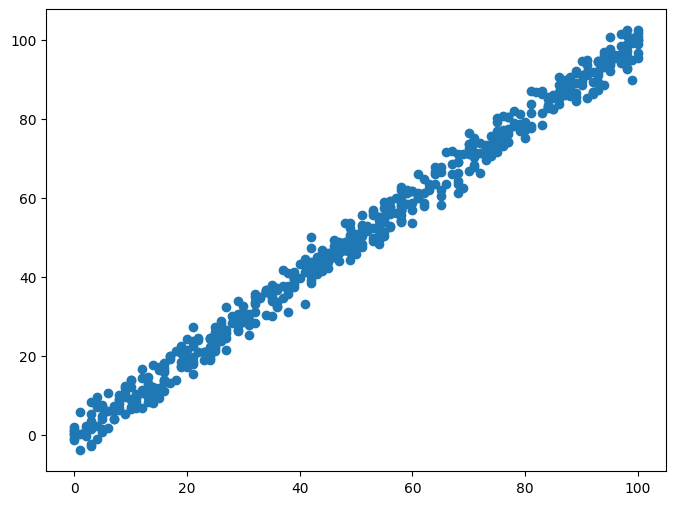

In [289]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)

## Build the Linear Regression Model

In [290]:
class LinearRegression:

    def __init__(self, lr = 0.001, n_it=1000):
        self.lr = lr
        self.n_it = n_it
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_it):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

## Testing our algorithm

As the basic data cleaning and preparation demo has been show, here is some randomly generated data to show a less compact graph

In [291]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)


Splicing data

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


Plotting the new data

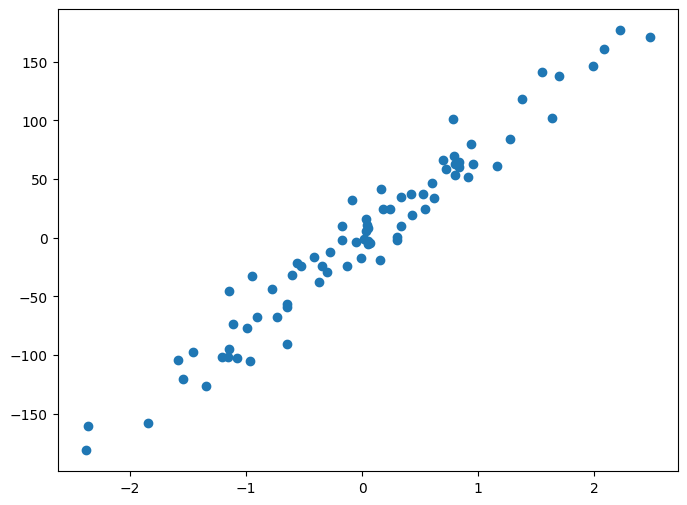

In [293]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.show()

Training our model on some data

305.7719958301902


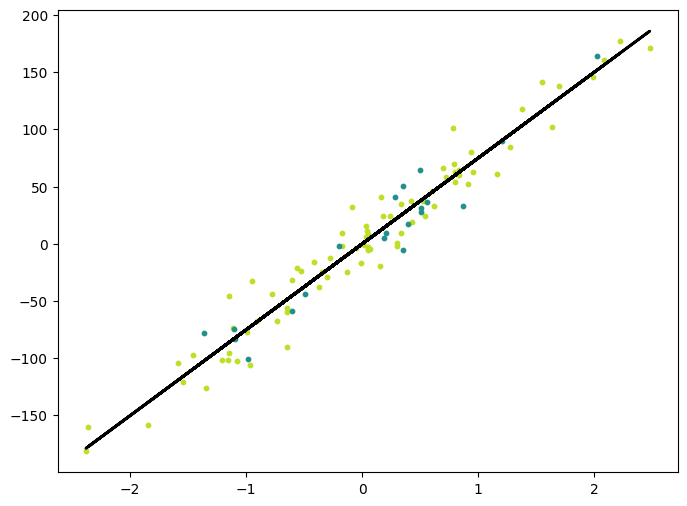

In [304]:
reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()